<a href="https://colab.research.google.com/github/rinvictor/deep-learning/blob/main/07MIAR_Proyecto_Programacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. El/La alumnx deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el/la alumnx utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

# Descargar datos de Kaggle

=IMPORTANTE========METER EL kaggle.json EN LOS ARCHIVOS===============

In [1]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vrincon","key":"4281cc641bbb37e5d7ba8bc2a3cc7793"}'}

In [2]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!ls ~/.kaggle/

kaggle.json


In [4]:
!(kaggle datasets list -s yoga)

ref                                                           title                                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
tr1gg3rtrash/yoga-posture-dataset                             Yoga Posture Dataset                                 447MB  2022-09-05 04:18:35           3602         76  0.875            
niharika41298/yoga-poses-dataset                              Yoga Poses Dataset                                   288MB  2020-10-14 09:18:41           7575        106  0.75             
ujjwalchowdhury/yoga-pose-classification                      Yoga Pose Classification                              15MB  2022-06-05 14:46:16           1562         55  0.875            
shrutisaxena/yoga-pose-image-classification-dataset           Yog

In [5]:
!kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset

 99% 442M/447M [00:05<00:00, 126MB/s]
100% 447M/447M [00:05<00:00, 86.5MB/s]


In [6]:
# Creemos un directorio para descomprimir los datos
!mkdir yoga

In [10]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip yoga-posture-dataset.zip -d yoga

Archive:  yoga-posture-dataset.zip
  inflating: yoga/Adho Mukha Svanasana/File1.png  
  inflating: yoga/Adho Mukha Svanasana/File10.png  
  inflating: yoga/Adho Mukha Svanasana/File11.png  
  inflating: yoga/Adho Mukha Svanasana/File12.png  
  inflating: yoga/Adho Mukha Svanasana/File13.png  
  inflating: yoga/Adho Mukha Svanasana/File14.png  
  inflating: yoga/Adho Mukha Svanasana/File15.png  
  inflating: yoga/Adho Mukha Svanasana/File16.png  
  inflating: yoga/Adho Mukha Svanasana/File17.png  
  inflating: yoga/Adho Mukha Svanasana/File18.png  
  inflating: yoga/Adho Mukha Svanasana/File19.png  
  inflating: yoga/Adho Mukha Svanasana/File2.png  
  inflating: yoga/Adho Mukha Svanasana/File20.png  
  inflating: yoga/Adho Mukha Svanasana/File21.png  
  inflating: yoga/Adho Mukha Svanasana/File22.png  
  inflating: yoga/Adho Mukha Svanasana/File23.png  
  inflating: yoga/Adho Mukha Svanasana/File24.png  
  inflating: yoga/Adho Mukha Svanasana/File25.jpg  
  inflating: yoga/Adho Mukha Sv

In [11]:
!ls yoga

'Adho Mukha Svanasana'	    Garudasana		        Sivasana
'Adho Mukha Vrksasana'	    Halasana		       'Supta Kapotasana'
 Alanasana		    Hanumanasana	        Trikonasana
 Anjaneyasana		    Malasana		       'Upavistha Konasana'
'Ardha Chandrasana'	    Marjaryasana	       'Urdhva Dhanurasana'
'Ardha Matsyendrasana'	    Navasana		       'Urdhva Mukha Svsnssana'
'Ardha Navasana'	    Padmasana		        Ustrasana
'Ardha Pincha Mayurasana'  'Parsva Virabhadrasana'      Utkatasana
'Ashta Chandrasana'	    Parsvottanasana	        Uttanasana
'Baddha Konasana'	    Paschimottanasana	       'Utthita Hasta Padangusthasana'
 Bakasana		    Phalakasana		       'Utthita Parsvakonasana'
 Balasana		   'Pincha Mayurasana'	        Vasisthasana
 Bitilasana		    Poses.json		       'Virabhadrasana One'
 Camatkarasana		   'Salamba Bhujangasana'      'Virabhadrasana Three'
 Dhanurasana		   'Salamba Sarvangasana'      'Virabhadrasana Two'
'Eka Pada Rajakapotasana'  'Setu Bandha Sarvangasana'   Vrksasana


# Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numba import cuda

# Carga de datos

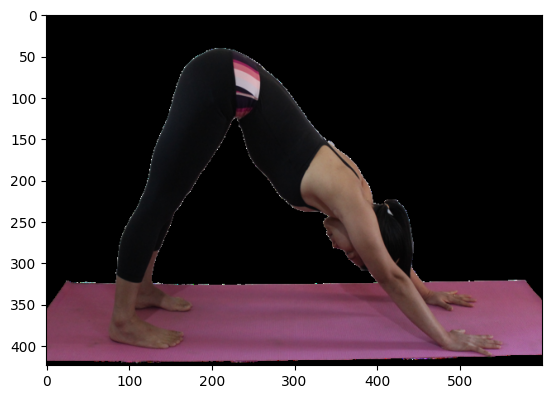

In [5]:
# Escogiendo y mostrando una imagen al azar del conjunto de test
idx = np.random.randint(1, 60)
img = cv2.imread('yoga/Adho Mukha Svanasana/File' + str(idx) + '.png', cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
# Crea un DataFrame con todos los nombres de las imágenes, descripción (posición)
# y una codificación de las descripción (label).
def crear_dataframe(ruta_dataset):
    data = []
    clases = np.sort([nombre for nombre in os.listdir(ruta_dataset) if os.path.isdir(os.path.join(ruta_dataset, nombre))])

    for clase in clases:
        clase_path = os.path.join(ruta_dataset, clase)
        for imagen_nombre in os.listdir(clase_path):
          data.append((os.path.join(clase_path, imagen_nombre), clase))

    df = pd.DataFrame(data, columns=['File', 'Description'])

    return df

yoga = crear_dataframe('yoga')

# Inspección del conjunto de datos

En los pasos siguientes se estudiarán los datos para evaluar, en futuras secciones, la necesidad de usar técnicas (como Data Augmentation).

In [7]:
yoga.head()

,File,Description
0,yoga/Adho Mukha Svanasana/File39.png,Adho Mukha Svanasana
1,yoga/Adho Mukha Svanasana/File73.jpeg,Adho Mukha Svanasana
2,yoga/Adho Mukha Svanasana/File17.png,Adho Mukha Svanasana
3,yoga/Adho Mukha Svanasana/File44.png,Adho Mukha Svanasana
4,yoga/Adho Mukha Svanasana/File38.png,Adho Mukha Svanasana


In [8]:
print("Número total de imágenes:", len(yoga))

Número total de imágenes: 2758


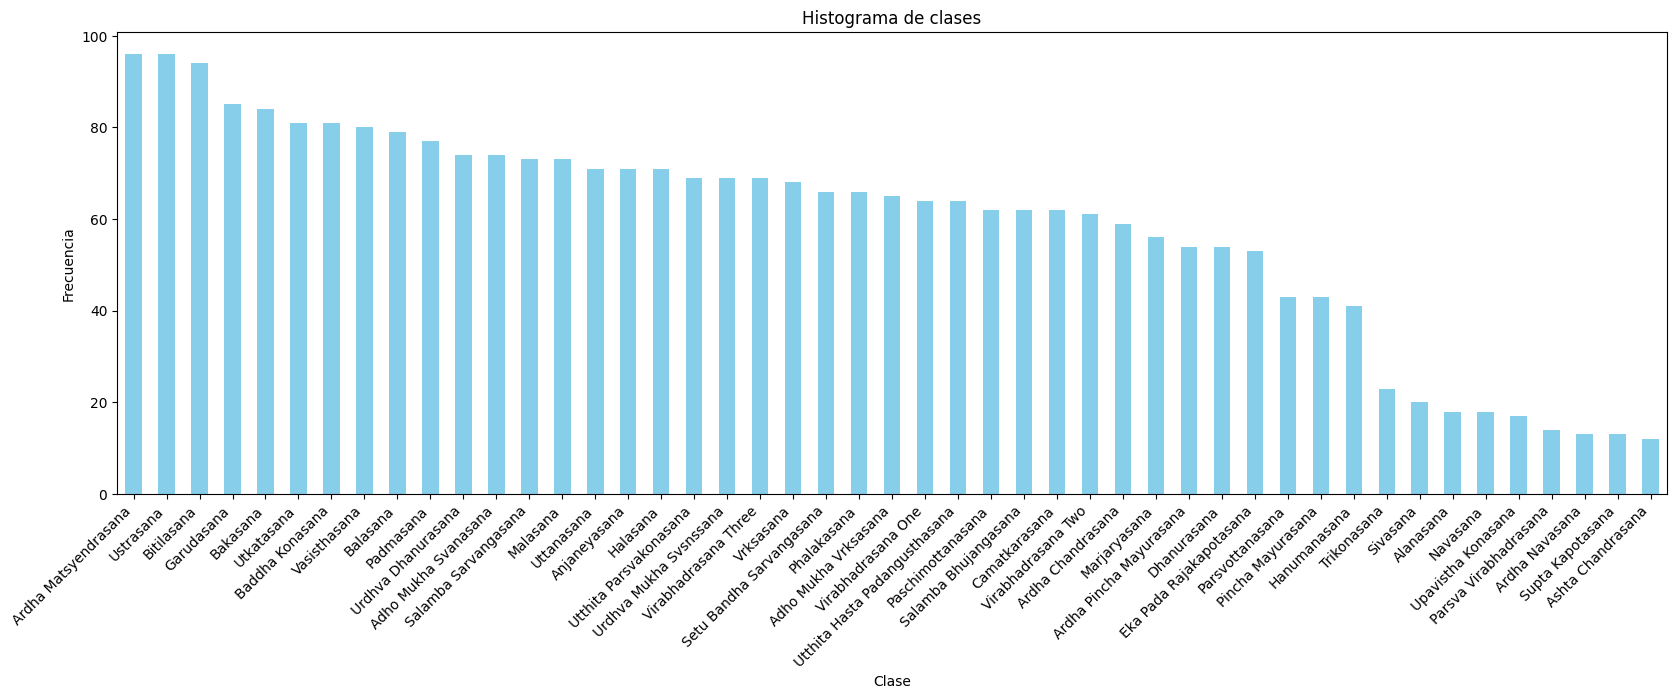

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
yoga['Description'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histograma de clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

Esta figura nos indica un claro desbalanceo entre clases, por lo que será necesario aplicar algún procedimiento que permita generar muchas imágenes para las clases con pocas muestras.

In [10]:
imagenes_aleatorias = yoga.sample(n=4)['File'].tolist()
for ruta_imagen in imagenes_aleatorias:
    imagen = cv2.imread(ruta_imagen)
    if imagen is not None:
        dimensiones = imagen.shape[:2]
        print(f"Imagen '{ruta_imagen}'")
        print(f"\tDimensiones-{dimensiones}\n\tRango de valores-({np.min(imagen)}-{np.max(imagen)})\n")

Imagen 'yoga/Virabhadrasana Three/File69.jpeg'
	Dimensiones-(192, 262)
	Rango de valores-(0-255)

Imagen 'yoga/Salamba Bhujangasana/File49.png'
	Dimensiones-(162, 500)
	Rango de valores-(0-255)

Imagen 'yoga/Phalakasana/File63.jpeg'
	Dimensiones-(193, 262)
	Rango de valores-(0-255)

Imagen 'yoga/Bitilasana/File2.png'
	Dimensiones-(206, 334)
	Rango de valores-(0-255)



Las dimensiones son completamente distintas entre las imágenes, será necesario también un reescalado de imágenes.

Además, el rango de valores es de 0 a 255. También será necesaria una normalización.

## Vaciar memoria RAM GPU

In [11]:
device = cuda.get_current_device()
device.reset()

# Preparar los datos

In [12]:
def obtener_train_test(dataset, normalizar=False, x_col="File", y_col="Description"):
  X = yoga['File']
  y = yoga['Description']
  trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

  # Cargar las imágenes en una lista
  images = []
  failed_index = []
  for i, path in enumerate(trainX):
      image = cv2.imread(path)
      if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
          image = cv2.resize(image, (256,256))
          if normalizar:
            image = image/255.0
          images.append(image)
      else:
          print(f"La imagen en {path} no se pudo cargar.")
          failed_index.append(i)

  # Convertir la lista de matrices en una sola matriz
  trainX = np.stack(images)
  trainY = np.delete(trainY, failed_index)

  failed_index = []
  images = []
  for i, path in enumerate(testX):
      image = cv2.imread(path)
      if image is not None:
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
          image = cv2.resize(image, (256,256))
          if normalizar:
            image = image/255.0
          images.append(image)
      else:
          print(f"La imagen en {path} no se pudo cargar.")
          failed_index.append(i)

  # Convertir la lista de matrices en una sola matriz
  testX = np.stack(images)
  testY = np.delete(testY, failed_index)

  lb = LabelBinarizer()
  trainY = lb.fit_transform(trainY)
  testY = lb.transform(testY)

  return trainX, testX, trainY, testY

def graficar_historial(H):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()

# From Scratch

In [13]:
trainX, testX, trainY, testY = obtener_train_test(yoga, normalizar=True)

labelNames = ['Adho Mukha Svanasana', 'Adho Mukha Vrksasana', 'Alanasana', 'Anjaneyasana',
 'Ardha Chandrasana', 'Ardha Matsyendrasana', 'Ardha Navasana',
 'Ardha Pincha Mayurasana', 'Ashta Chandrasana', 'Baddha Konasana',
 'Bakasana', 'Balasana', 'Bitilasana', 'Camatkarasana', 'Dhanurasana',
 'Eka Pada Rajakapotasana', 'Garudasana', 'Halasana', 'Hanumanasana',
 'Malasana', 'Marjaryasana', 'Navasana', 'Padmasana', 'Parsva Virabhadrasana',
 'Parsvottanasana', 'Paschimottanasana', 'Phalakasana', 'Pincha Mayurasana',
 'Salamba Bhujangasana', 'Salamba Sarvangasana', 'Setu Bandha Sarvangasana',
 'Sivasana', 'Supta Kapotasana', 'Trikonasana', 'Upavistha Konasana',
 'Urdhva Dhanurasana', 'Urdhva Mukha Svsnssana', 'Ustrasana', 'Utkatasana',
 'Uttanasana', 'Utthita Hasta Padangusthasana', 'Utthita Parsvakonasana',
 'Vasisthasana', 'Virabhadrasana One', 'Virabhadrasana Three',
 'Virabhadrasana Two', 'Vrksasana']

La imagen en yoga/Virabhadrasana One/File56.gif no se pudo cargar.
La imagen en yoga/Virabhadrasana Two/File56.gif no se pudo cargar.


In [22]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#########################################
###### Definimos la arquitectura ########
#########################################
#BASE MODEL
# Definimos entradas
inputs = Input(shape=(256, 256, 3))

x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)

x2 = Conv2D(128, (3, 3), padding="same", activation="relu")(x1)
x2 = Conv2D(128, (3, 3), padding="same", activation="relu")(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)

x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3) #(X)

x4 = Conv2D(512, (3, 3), padding="same", activation="relu")(x3)
x4 = Conv2D(512, (3, 3), padding="same", activation="relu")(x4)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2))(x4)
x4 = Dropout(0.25)(x4) #(X)

# TOP MODEL
xfc = Flatten()(x4) #(X)
xfc = Dense(512, activation="relu", kernel_regularizer=l2(0.001))(xfc) #(X)
xfc = BatchNormalization()(xfc) #(X)
xfc = Dropout(0.3)(xfc) #(X)
# Clasificador softmax
predictions = Dense(47, activation="softmax")(xfc) #(X)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model = Model(inputs=inputs, outputs=predictions) #(X)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                             

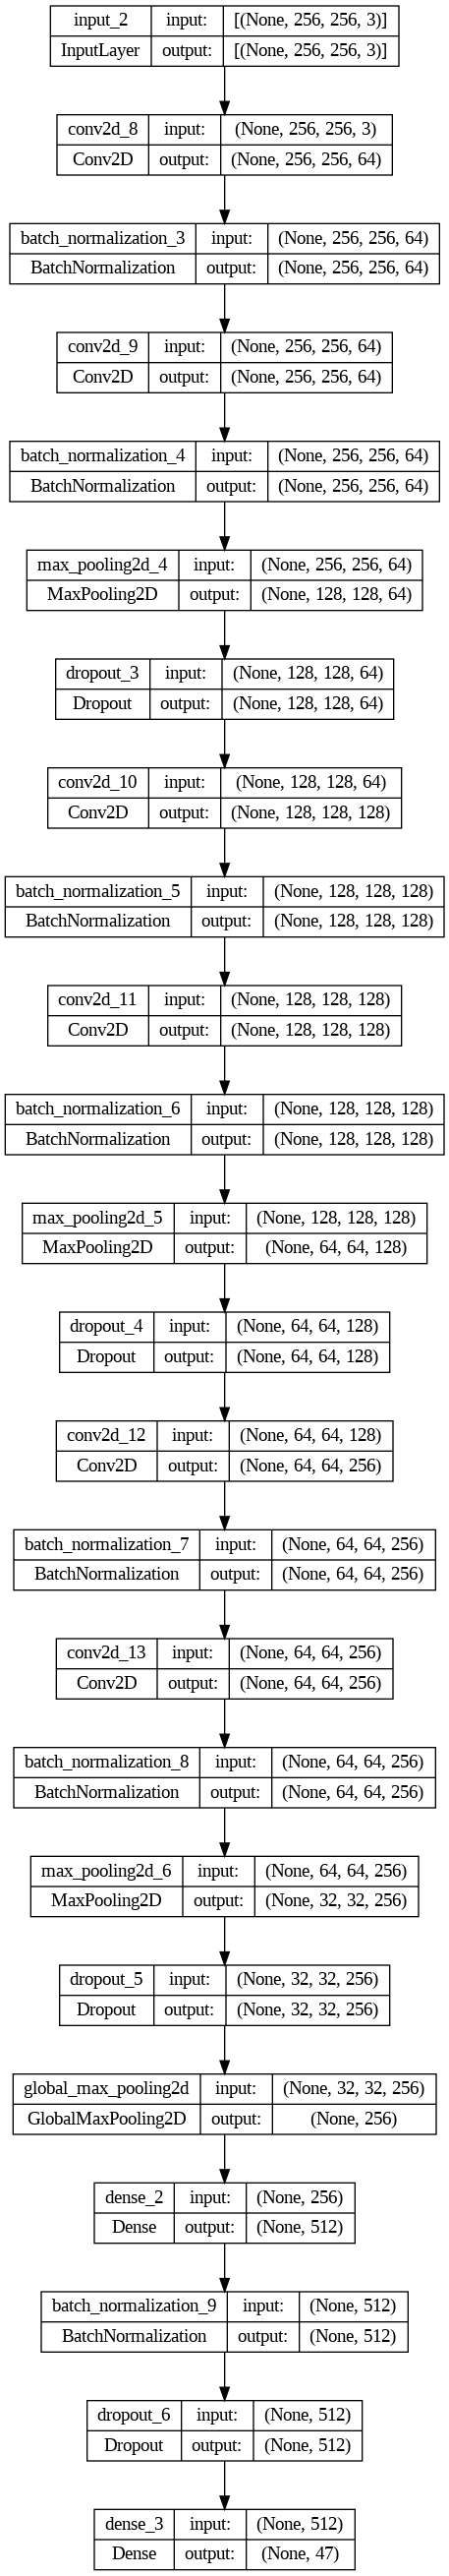

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model_aug, to_file='model_aug_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"]) #(X)

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model.fit(trainX, trainY, validation_split=0.2,batch_size= 32,epochs=45)

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/45
56/56 [==============================] - 79s 863ms/step - loss: 6.6514 - accuracy: 0.1361 - val_loss: 17.6062 - val_accuracy: 0.0454
Epoch 2/45
56/56 [==============================] - 35s 630ms/step - loss: 5.5774 - accuracy: 0.3851 - val_loss: 6.4242 - val_accuracy: 0.2381
Epoch 3/45
56/56 [==============================] - 34s 604ms/step - loss: 4.7572 - accuracy: 0.5508 - val_loss: 7.6842 - val_accuracy: 0.1973
Epoch 4/45
56/56 [==============================] - 34s 607ms/step - loss: 4.2391 - accuracy: 0.7385 - val_loss: 5.9103 - val_accuracy: 0.3311
Epoch 5/45
56/56 [==============================] - 34s 606ms/step - loss: 3.7737 - accuracy: 0.8599 - val_loss: 6.3482 - val_accuracy: 0.3175
Epoch 6/45
56/56 [==============================] - 35s 620ms/step - loss: 3.3086 - accuracy: 0.9104 - val_loss: 6.6481 - val_accuracy: 0.1565
Epoch 7/45
56/56 [==============================] - 34s 603ms/step - loss: 2.698

In [ ]:
model.save("modelo_entrenado.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Evaluación del modelo

print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model.predict(testX, batch_size=128) #(X)
# Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO]: Evaluando el modelo...
5/5 [==============================] - 34s 3s/step
                               precision    recall  f1-score   support

         Adho Mukha Svanasana       0.32      0.60      0.42        15
         Adho Mukha Vrksasana       0.19      0.46      0.27        13
                    Alanasana       0.00      0.00      0.00         4
                 Anjaneyasana       1.00      0.14      0.25        14
            Ardha Chandrasana       0.40      0.33      0.36        12
         Ardha Matsyendrasana       0.60      0.47      0.53        19
               Ardha Navasana       0.33      0.50      0.40         2
      Ardha Pincha Mayurasana       0.67      0.55      0.60        11
            Ashta Chandrasana       0.00      0.00      0.00         2
              Baddha Konasana       0.62      0.50      0.55        16
                     Bakasana       0.60      0.53      0.56        17
                     Balasana       0.61      0.69      0.65     

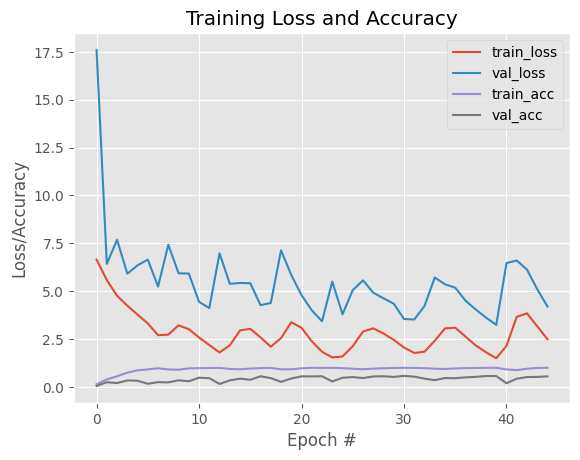

In [28]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 45), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 45), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 45), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 45), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## **REDUCIENDO OVERFITTING MEDIANTE DATA AUGMENTATION, BACTH NORMALIZATION EN CADA CAPA DE CADA UNO DE LOS BLOQUES Y CON GLOBALMAXPOOLING EN VEZ DE FLATTEN EN EL TOP MODEL**

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15, # grados de rotacion aleatoria
    width_shift_range=0.2, # fraccion del total (1) para mover la imagen
    height_shift_range=0.2, # fraccion del total (1) para mover la imagen
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    # shear_range=0, # deslizamiento
    zoom_range=0.2, # rango de zoom
    # fill_mode='nearest', # como rellenar posibles nuevos pixeles
    # channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
    validation_split=0.2,
)

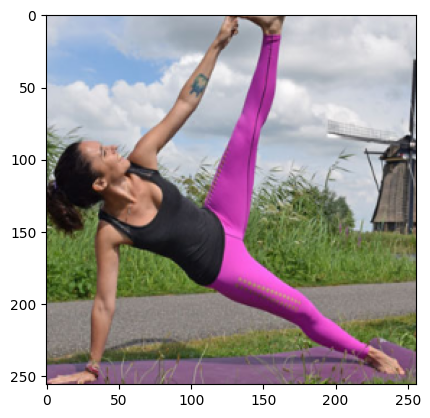

Label = Vasisthasana


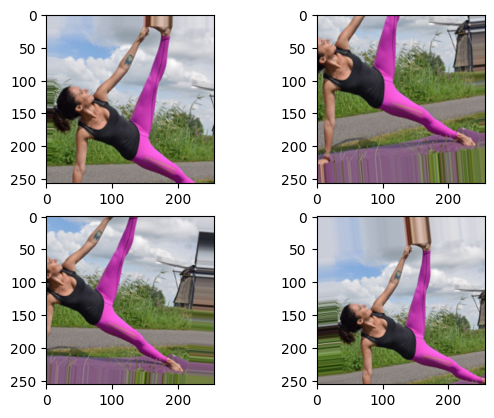

In [15]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 13
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,256,256,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

In [17]:
#########################################
###### Definimos la arquitectura ########
#########################################
#BASE MODEL
# Definimos entradas
inputs = Input(shape=(256, 256, 3))

x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

x2 = Conv2D(128, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(128, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3) #(X)

# TOP MODEL
xfc = GlobalMaxPooling2D()(x3) #(X)
xfc = Dense(512, activation="relu", kernel_regularizer=l2(0.001))(xfc) #(X)
xfc = BatchNormalization()(xfc) #(X)
xfc = Dropout(0.35)(xfc) #(X)
# Clasificador softmax
predictions = Dense(47, activation="softmax")(xfc) #(X)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_aug = Model(inputs=inputs, outputs=predictions) #(X)

model_aug.summary()

NameError: name 'Input' is not defined

In [18]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [19]:
inputs = Input(shape=(256, 256, 3))

x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Dropout(0.25)(x1)

x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Dropout(0.25)(x2)

x3 = Conv2D(128, (3, 3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(128, (3, 3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2))(x3)
x3 = Dropout(0.25)(x3) #(X)

# TOP MODEL
xfc = GlobalMaxPooling2D()(x3) #(X)
xfc = Dense(256, activation="relu", kernel_regularizer=l2(0.001))(xfc) #(X)
xfc = BatchNormalization()(xfc) #(X)
xfc = Dropout(0.35)(xfc) #(X)
# Clasificador softmax
predictions = Dense(47, activation="softmax")(xfc) #(X)

# Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
model_aug_2 = Model(inputs=inputs, outputs=predictions) #(X)

model_aug_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0     

Número total de parámetros en el modelo: 1306735


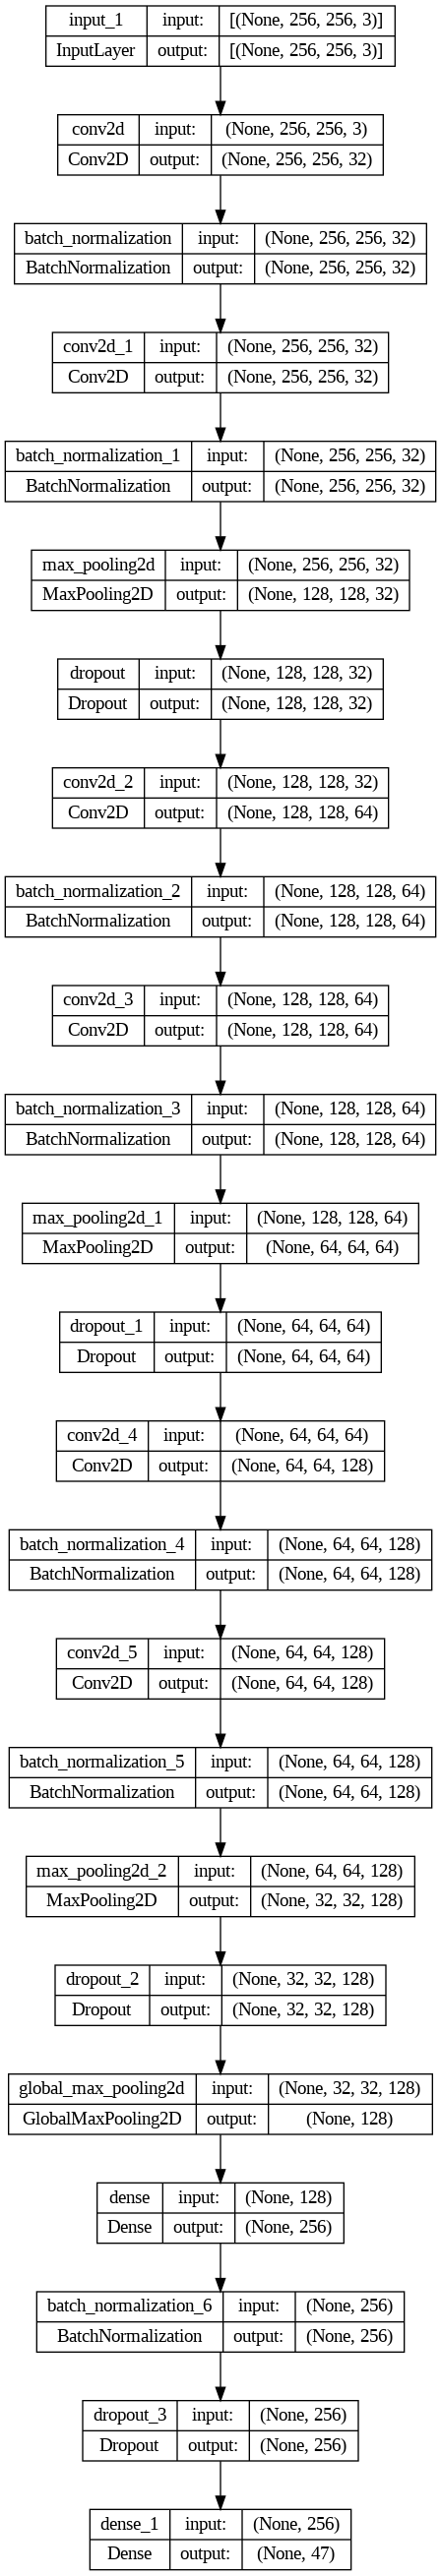

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model_aug_2, to_file='model_aug_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"]) #(X)

[INFO]: Compilando el modelo...


NameError: name 'model_aug' is not defined

In [24]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug_2.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"]) #(X)

[INFO]: Compilando el modelo...


In [ ]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_aug = model_aug_2.fit(datagen.flow(trainX, trainY, batch_size=64, subset="training"),
                                steps_per_epoch = len(trainX)/ 128, epochs=50, validation_data=datagen.flow(trainX, trainY, batch_size=8, subset="validation"))

[INFO]: Entrenando la red...
Epoch 1/50
17/17 [==============================] - 55s 2s/step - loss: 4.2813 - accuracy: 0.0285 - val_loss: 4.0564 - val_accuracy: 0.0273
Epoch 2/50
17/17 [==============================] - 30s 2s/step - loss: 4.1681 - accuracy: 0.0347 - val_loss: 4.1003 - val_accuracy: 0.0182
Epoch 3/50
17/17 [==============================] - 30s 2s/step - loss: 4.1165 - accuracy: 0.0329 - val_loss: 4.1289 - val_accuracy: 0.0182
Epoch 4/50
17/17 [==============================] - 30s 2s/step - loss: 4.0134 - accuracy: 0.0525 - val_loss: 4.1374 - val_accuracy: 0.0182
Epoch 5/50
17/17 [==============================] - 29s 2s/step - loss: 3.9761 - accuracy: 0.0507 - val_loss: 4.1651 - val_accuracy: 0.0182
Epoch 6/50
 4/17 [=====>........................] - ETA: 13s - loss: 3.8653 - accuracy: 0.0658

In [43]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_aug = model_aug.fit(datagen.flow(trainX, trainY, batch_size=128, subset="training"),
                                steps_per_epoch = len(trainX)/ 128, epochs=50, validation_data=datagen.flow(trainX, trainY, batch_size=8, subset="validation"))

[INFO]: Entrenando la red...
Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node model_1/batch_normalization_5/FusedBatchNormV3 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-43-d0762b8cf391>", line 3, in <cell line: 3>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py", line 597, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py", line 990, in _fused_batch_norm

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/control_flow_util.py", line 108, in smart_cond

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py", line 964, in _fused_batch_norm_training

OOM when allocating tensor with shape[128,128,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/batch_normalization_5/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_21618]

# Pre entrenada

In [45]:
trainX, testX, trainY, testY = obtener_train_test(yoga, normalizar=False)

La imagen en yoga/Virabhadrasana One/File56.gif no se pudo cargar.
La imagen en yoga/Virabhadrasana Two/File56.gif no se pudo cargar.


## VGG16

In [46]:
from tensorflow.keras.applications import VGG16, imagenet_utils

trainX = imagenet_utils.preprocess_input(trainX)

In [47]:
input_shape = (256,256, 3)

# Importar VGG16 con pesos de imagenet sin top_model especificando el tamaño de entrada
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

### Crear el top model y congelar las capas convolucionales

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

base_model.trainable = False
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu', name='densa_1'))
pre_trained_model.add(layers.Dense(47, activation='softmax'))

pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 densa_1 (Dense)             (None, 256)               8388864   
                                                                 
 dense_4 (Dense)             (None, 47)                12079     
                                                                 
Total params: 23115631 (88.18 MB)
Trainable params: 8400943 (32.05 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


### Entrenar la solución

In [49]:
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=['accuracy'])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = pre_trained_model.fit(trainX, trainY, batch_size=128, epochs=20, validation_split=0.2)

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/20
14/14 [==============================] - 54s 4s/step - loss: 10.2876 - accuracy: 0.3227 - val_loss: 2.8522 - val_accuracy: 0.5261
Epoch 2/20
14/14 [==============================] - 12s 856ms/step - loss: 0.5645 - accuracy: 0.8429 - val_loss: 2.0884 - val_accuracy: 0.5692
Epoch 3/20
14/14 [==============================] - 12s 866ms/step - loss: 0.1285 - accuracy: 0.9631 - val_loss: 2.0745 - val_accuracy: 0.6236
Epoch 4/20
14/14 [==============================] - 12s 884ms/step - loss: 0.0374 - accuracy: 0.9909 - val_loss: 2.0712 - val_accuracy: 0.6440
Epoch 5/20
14/14 [==============================] - 12s 895ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 2.0629 - val_accuracy: 0.6463
Epoch 6/20
14/14 [==============================] - 12s 895ms/step - loss: 0.0209 - accuracy: 0.9960 - val_loss: 2.0773 - val_accuracy: 0.6553
Epoch 7/20
14/14 [==============================] - 12s 878ms/step - loss: 0.0190 -

NameError: name 'label_names' is not defined

In [50]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = pre_trained_model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO]: Evaluando el modelo...
5/5 [==============================] - 3s 665ms/step
                               precision    recall  f1-score   support

         Adho Mukha Svanasana       0.83      0.67      0.74        15
         Adho Mukha Vrksasana       0.58      0.54      0.56        13
                    Alanasana       0.22      0.50      0.31         4
                 Anjaneyasana       0.40      0.14      0.21        14
            Ardha Chandrasana       0.54      0.58      0.56        12
         Ardha Matsyendrasana       0.87      0.68      0.76        19
               Ardha Navasana       0.00      0.00      0.00         2
      Ardha Pincha Mayurasana       0.33      0.55      0.41        11
            Ashta Chandrasana       0.00      0.00      0.00         2
              Baddha Konasana       0.91      0.62      0.74        16
                     Bakasana       0.89      0.47      0.62        17
                     Balasana       0.35      0.81      0.49   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


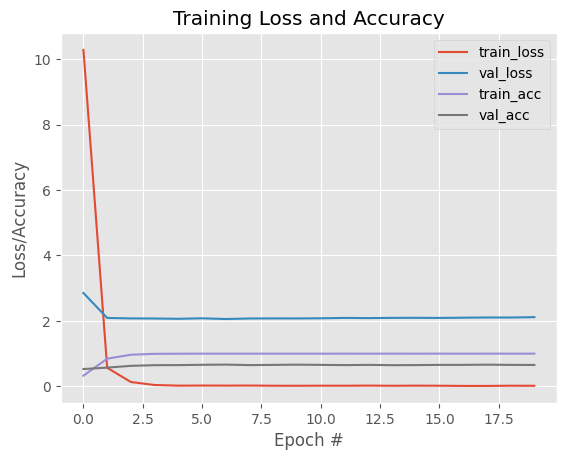

In [51]:
graficar_historial(H_pre)

### Data Augmentation

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15, # grados de rotacion aleatoria
    width_shift_range=0.2, # fraccion del total (1) para mover la imagen
    height_shift_range=0.2, # fraccion del total (1) para mover la imagen
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    # shear_range=0, # deslizamiento
    zoom_range=0.2, # rango de zoom
    # fill_mode='nearest', # como rellenar posibles nuevos pixeles
    # channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
    validation_split=0.2,
)

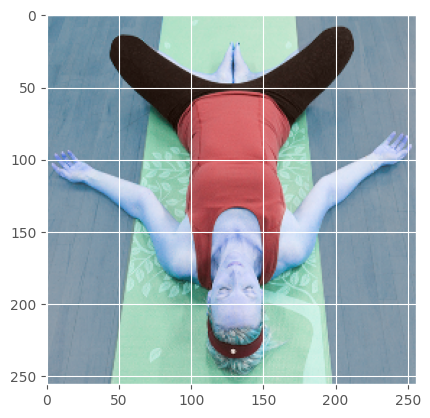

Label = Baddha Konasana


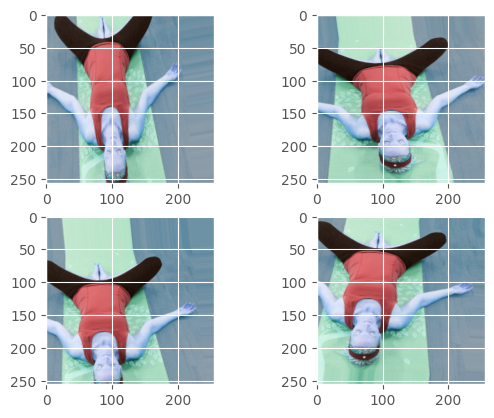

In [54]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 342
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,256,256,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

In [56]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_aug = pre_trained_model.fit(datagen.flow(trainX, trainY, batch_size=128, subset="training"),
                              epochs=20, validation_data=datagen.flow(trainX, trainY, batch_size=8, subset="validation"))

[INFO]: Entrenando la red...
Epoch 1/20
14/14 [==============================] - 63s 4s/step - loss: 3.1565 - accuracy: 0.3073 - val_loss: 2.9712 - val_accuracy: 0.2341
Epoch 2/20
14/14 [==============================] - 41s 3s/step - loss: 2.7513 - accuracy: 0.3186 - val_loss: 2.7234 - val_accuracy: 0.3545
Epoch 3/20
14/14 [==============================] - 37s 3s/step - loss: 2.3759 - accuracy: 0.4138 - val_loss: 2.8719 - val_accuracy: 0.3409
Epoch 4/20
14/14 [==============================] - 39s 3s/step - loss: 2.0080 - accuracy: 0.4932 - val_loss: 2.5303 - val_accuracy: 0.4250
Epoch 5/20
14/14 [==============================] - 37s 3s/step - loss: 1.9212 - accuracy: 0.5391 - val_loss: 2.5206 - val_accuracy: 0.4341
Epoch 6/20
14/14 [==============================] - 39s 3s/step - loss: 1.6988 - accuracy: 0.5539 - val_loss: 2.2515 - val_accuracy: 0.4727
Epoch 7/20
14/14 [==============================] - 38s 3s/step - loss: 1.5721 - accuracy: 0.5754 - val_loss: 2.0940 - val_accuracy

In [57]:
# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model.predict(testX, batch_size=128)
# Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO]: Evaluando el modelo...
5/5 [==============================] - 3s 672ms/step
                               precision    recall  f1-score   support

         Adho Mukha Svanasana       0.78      0.47      0.58        15
         Adho Mukha Vrksasana       0.64      0.69      0.67        13
                    Alanasana       0.40      0.50      0.44         4
                 Anjaneyasana       0.33      0.21      0.26        14
            Ardha Chandrasana       0.58      0.92      0.71        12
         Ardha Matsyendrasana       0.83      0.79      0.81        19
               Ardha Navasana       0.25      0.50      0.33         2
      Ardha Pincha Mayurasana       0.45      0.45      0.45        11
            Ashta Chandrasana       0.00      0.00      0.00         2
              Baddha Konasana       0.69      0.56      0.62        16
                     Bakasana       0.63      0.71      0.67        17
                     Balasana       0.67      0.88      0.76   

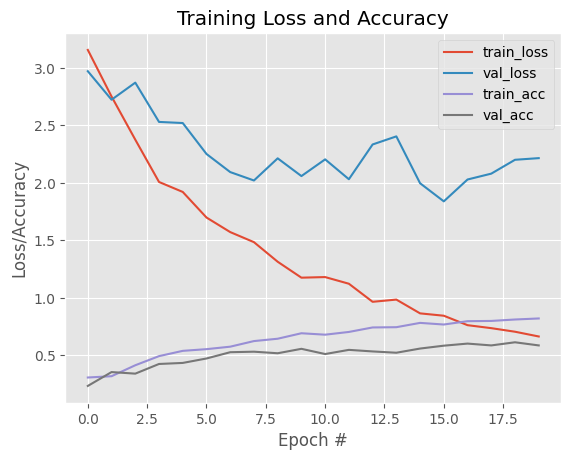

In [58]:
graficar_historial(H_aug)

## ResNet50

In [ ]:
from keras.applications import ResNet50
# Importar ResNet50 con pesos de imagenet sin top_model especificando el tamaño de entrada
base_model2 = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model2.summary()

base_model2.trainable = False
pre_trained_model2 = Sequential()
pre_trained_model2.add(base_model2)
pre_trained_model2.add(layers.Flatten())
pre_trained_model2.add(layers.Dense(256, activation='relu', name='densa_1'))
pre_trained_model2.add(layers.Dense(47, activation='softmax'))

pre_trained_model2.summary()

In [ ]:
# Compilar el modelo
print("[INFO]: Compilando el modelo...")
pre_trained_model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=['accuracy'])

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_pre = pre_trained_model2.fit(trainX, trainY, batch_size=128, epochs=20, validation_split=0.2)

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
predictions = pre_trained_model2.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=label_names))

In [ ]:
graficar_historial(H_pre)

### Data Augmentation

In [ ]:
# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H_aug = pre_trained_model2.fit(datagen.flow(trainX, trainY, batch_size=128, subset="training"),
                              epochs=20, validation_data=datagen.flow(trainX, trainY, batch_size=8, subset="validation"))

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = pre_trained_model2.predict(testX, batch_size=128)
# Sacamos el report para test
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=label_names))

In [ ]:
graficar_historial(H_aug)